In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from datetime import datetime, timedelta

In [5]:
recession = pd.read_csv("Recession Quarterly.csv", parse_dates=True)

In [6]:
recession.head()

,DATE,USRECQ,UNEMP,CPI3,CPI,GDP,STOCKS3,STOCKS,TREASURY,FEDFUND
0,1854-10-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1855-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1855-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1855-07-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1855-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
recession.DATE = pd.to_datetime(recession.DATE)
recession['QUARTER'] = pd.PeriodIndex(recession.DATE, freq='Q').strftime('Q%q')
#recession = recession[recession['DATE'] >= datetime(1948, 1, 1)]
recession = recession.ffill()
recession.head()

,DATE,USRECQ,UNEMP,CPI3,CPI,GDP,STOCKS3,STOCKS,TREASURY,FEDFUND,QUARTER
0,1854-10-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q4
1,1855-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q1
2,1855-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2
3,1855-07-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q3
4,1855-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q4


In [120]:
recession.corr().style.background_gradient(cmap='coolwarm')

,USRECQ,UNEMP,CPI3,CPI,GDP,STOCKS,TREASURY,FEDFUND
USRECQ,1.000000,0.158728,0.003284,-0.012315,-0.445013,-0.285834,0.002790,-0.535703
UNEMP,0.158728,1.000000,0.043376,0.031798,-0.020686,0.129603,0.515741,-0.313449
CPI3,0.003284,0.043376,1.000000,0.921175,0.397372,-0.053494,-0.414532,0.219603
CPI,-0.012315,0.031798,0.921175,1.000000,0.442422,-0.037139,-0.383356,0.197918
GDP,-0.445013,-0.020686,0.397372,0.442422,1.000000,0.207805,-0.133916,0.341354
STOCKS,-0.285834,0.129603,-0.053494,-0.037139,0.207805,1.000000,0.051418,-0.050298
TREASURY,0.002790,0.515741,-0.414532,-0.383356,-0.133916,0.051418,1.000000,-0.360267
FEDFUND,-0.535703,-0.313449,0.219603,0.197918,0.341354,-0.050298,-0.360267,1.000000


We can see a high correlation between the following columns in order of highly correlated to moderately correlated:
1. GDP and Unemployment
2. PPI and GDP
3. PPI and stocks
4. GDP and Stocks

### Plot of Count of Recession in each Quarter

<BarContainer object of 4 artists>

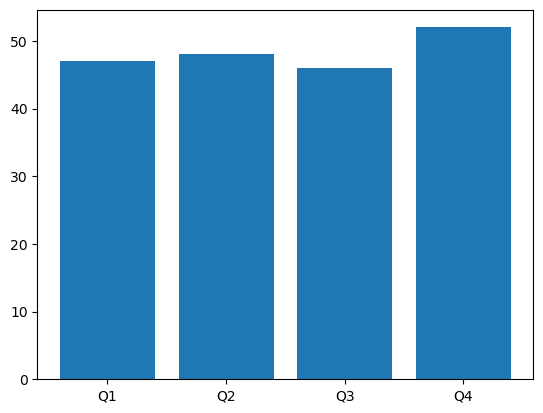

In [101]:
quarterly_recession = recession.groupby(recession['QUARTER'])['USRECQ'].sum() 
plt.bar(['Q1','Q2','Q3','Q4'], quarterly_recession)


The plot shows there is no particular quarter where recession occurs for a higher number of times. There is almost an equal amount of recession period in every quarter.

## GDP Trend based on Recession/Expansion Period

Text(0.5, 1.0, 'GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

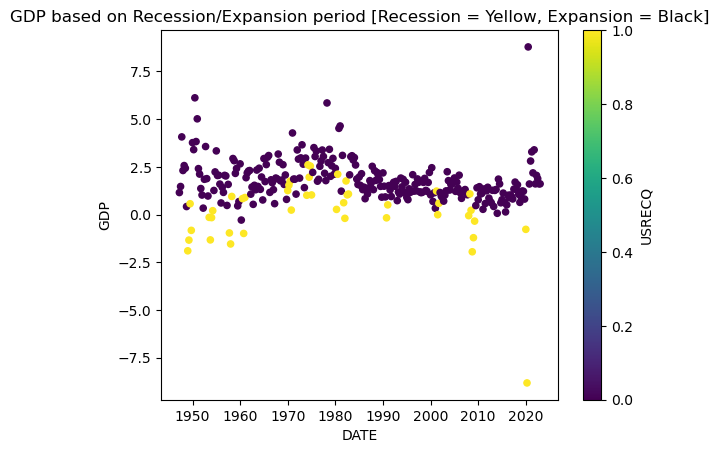

In [16]:
recession_gdp = recession[recession['DATE'] > datetime(1947, 1, 1)]
recession_gdp.head()
recession_gdp.plot.scatter(x = 'DATE', y = 'GDP', c= 'USRECQ',colormap='viridis')
plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

From the plot it is clear that for every recession period the GDP is lower than the average GDP for that year

## Yeild Curve

### With GDP 

Text(0.5, 1.0, 'Yeild Curve of occurence of Recession based on GDP')

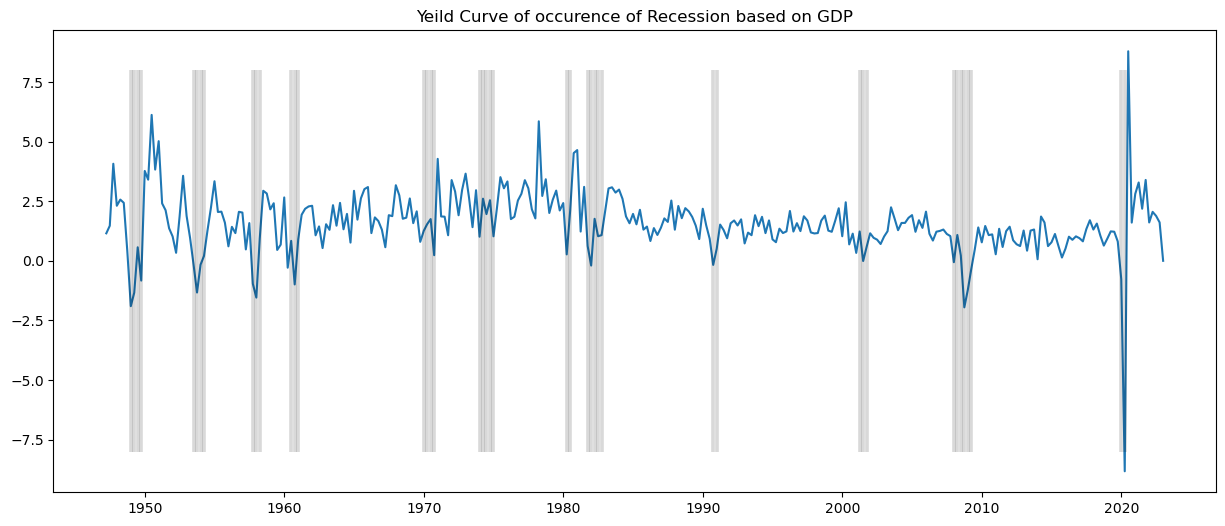

In [77]:
plt.figure(figsize=(15,6))
plt.plot(recession_gdp.DATE,recession_gdp.GDP)
#plt.vlines(x=[datetime(1947, 1, 1), datetime(2024, 1, 1)], y=recession_gdp.USRECQ, color='r', label='test lines')
for index, row in recession_gdp.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -8, ymax = 8, color='k', alpha=0.15,linewidth = 2.6)
plt.title('Yeild Curve of occurence of Recession based on GDP')

### With Treasury data

In [13]:
recession_trs = recession[recession['DATE'] > datetime(1982, 1, 1)]
recession_trs.head()

,DATE,USRECQ,UNEMP,PPI,GDP,STOCKS,TREASURY,QUARTER
510,1982-04-01,1,9.433333,0.10030,1.76129,-0.60403,0.890476,Q2
511,1982-07-01,1,9.900000,0.43420,1.03092,-0.89259,3.438750,Q3
512,1982-10-01,1,10.666667,0.09977,1.07652,21.05111,2.493115,Q4
513,1983-01-01,0,10.366667,0.03322,2.08231,9.23493,2.157143,Q1
514,1983-04-01,0,10.133333,0.36533,3.03549,11.74453,1.823810,Q2


Text(0.5, 1.0, 'Yeild Curve of occurence of Recession based on Treasury Constant Maturity 10Y3M')

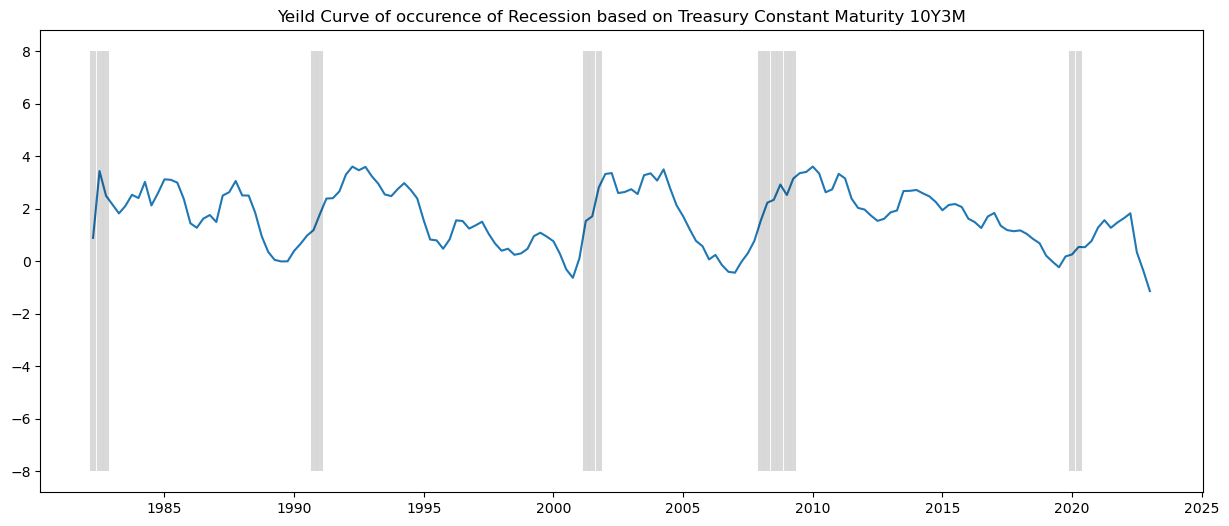

In [17]:
plt.figure(figsize=(15,6))
plt.plot(recession_trs.DATE,recession_trs.TREASURY)
#plt.vlines(x=[datetime(1947, 1, 1), datetime(2024, 1, 1)], y=recession_gdp.USRECQ, color='r', label='test lines')
for index, row in recession_trs.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -8, ymax = 8, color='k', alpha=0.15,linewidth = 4.4)
plt.title('Yeild Curve of occurence of Recession based on Treasury Constant Maturity 10Y3M')

## With Unemployment data

Text(0.5, 1.0, 'Yeild Curve of occurence of Recession based on Treasury Constant Maturity 10Y3M')

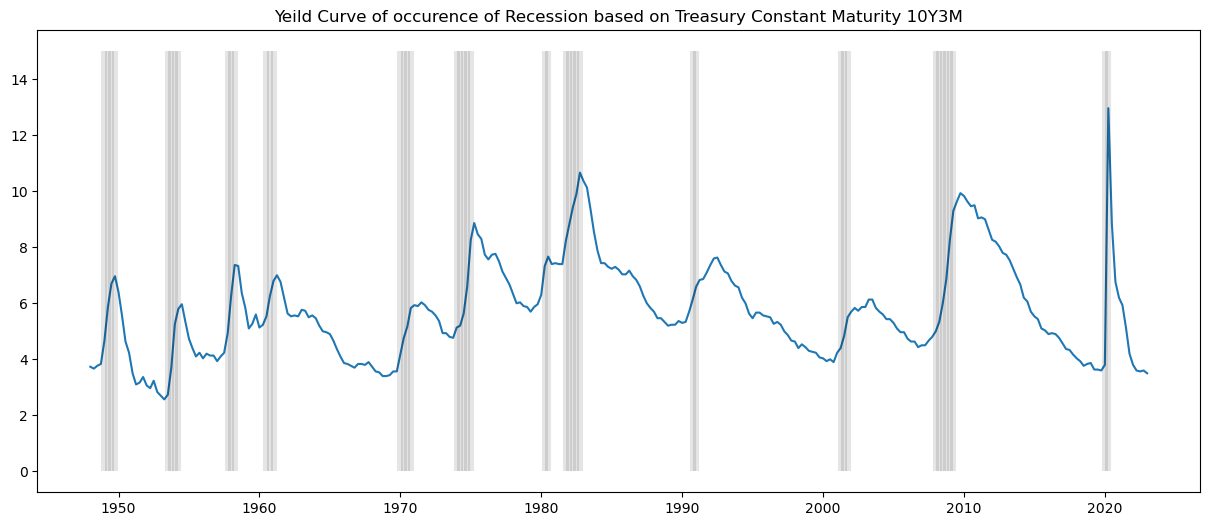

In [24]:
recession_emp = recession[recession['DATE'] >= datetime(1948, 1, 1)]
#recession_emp.head()
plt.figure(figsize=(15,6))
plt.plot(recession_emp.DATE,recession_emp.UNEMP)
for index, row in recession_emp.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 15, color='k', alpha=0.1,linewidth = 4.4)

## With 3MA Unemployment data

### With Stocks

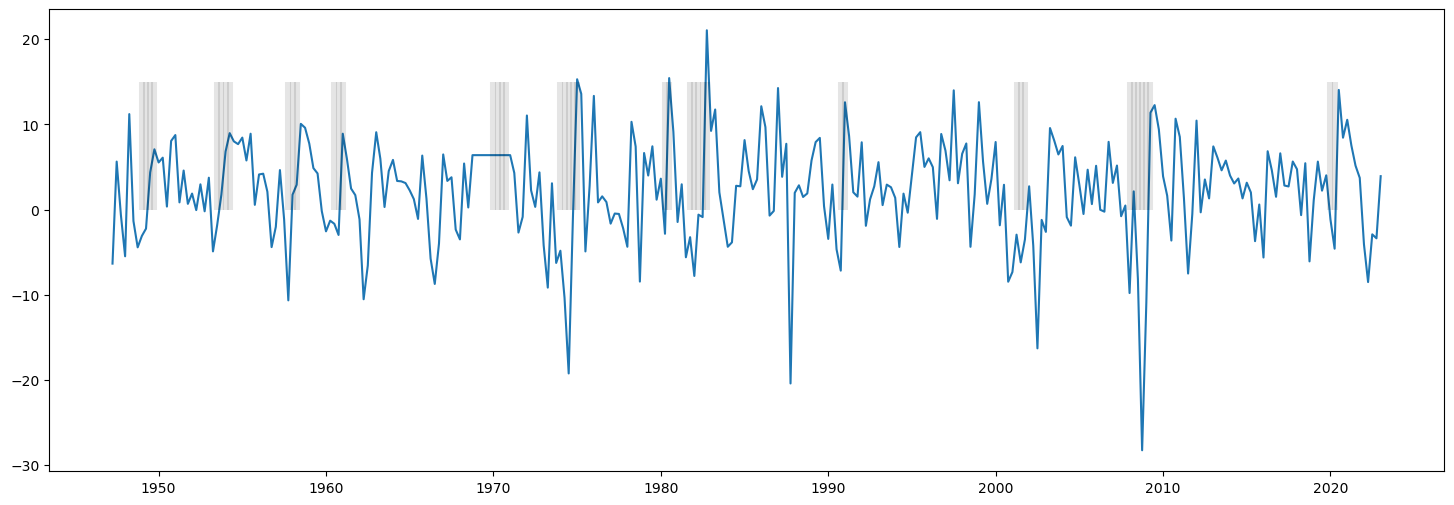

In [111]:
#recession_stk = recession[recession['DATE'] > datetime(1871, 1, 1)]
recession_stk = recession[recession['DATE'] > datetime(1947, 1, 1)]

plt.figure(figsize=(18,6))
plt.plot(recession_stk.DATE,recession_stk.STOCKS)
for index, row in recession_stk.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 15, color='k', alpha=0.1,linewidth = 4.4)

### With 3MA Stocks

In [114]:
#recession_stk = recession[recession['DATE'] > datetime(1871, 1, 1)]
recession_stk3 = recession[recession['DATE'] > datetime(1990, 4, 1)]#(1947, 4, 1)]
recession_stk3.head(10)
recession_stk3.tail(10)


plt.figure(figsize=(18,6))
plt.plot(recession_stk3.DATE, recession_stk3.STOCKS3)
for index, row in recession_stk3.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 15, color='k', alpha=0.1,linewidth = 4.4)

,DATE,USRECQ,UNEMP,CPI,GDP,STOCKS3,STOCKS,TREASURY,FEDFUND,QUARTER
664,2020-10-01,0,2.422222,0.69640,1.60224,3.668787778,8.43589,0.771613,0.002222,Q4
665,2021-01-01,0,2.100000,1.03022,2.80651,2.945336667,10.53875,1.284754,-0.002593,Q1
666,2021-04-01,0,1.918519,1.82899,3.28533,2.580226667,7.53339,1.565625,0.000000,Q2
667,2021-07-01,0,1.696296,1.61219,2.18461,1.822138889,5.14990,1.275156,0.000000,Q3
668,2021-10-01,0,1.459259,2.13250,3.39145,0.531433333,3.71596,1.479194,0.005556,Q4
669,2022-01-01,0,1.288889,2.21990,1.60728,-0.987728889,-4.08296,1.641774,0.075556,Q1
670,2022-04-01,0,1.218519,2.33140,2.05330,-1.724834444,-8.52256,1.828871,0.234444,Q2
671,2022-07-01,0,1.196296,1.35832,1.88314,-1.647208889,-2.91799,0.347656,0.392593,Q3
672,2022-10-01,0,1.185185,1.02517,1.60959,-0.265318889,-3.38433,-0.360656,0.416296,Q4
673,2023-01-01,0,1.183333,0.93984,1.60959,0.088353333,3.91445,-1.135484,0.387778,Q1


### With PPI

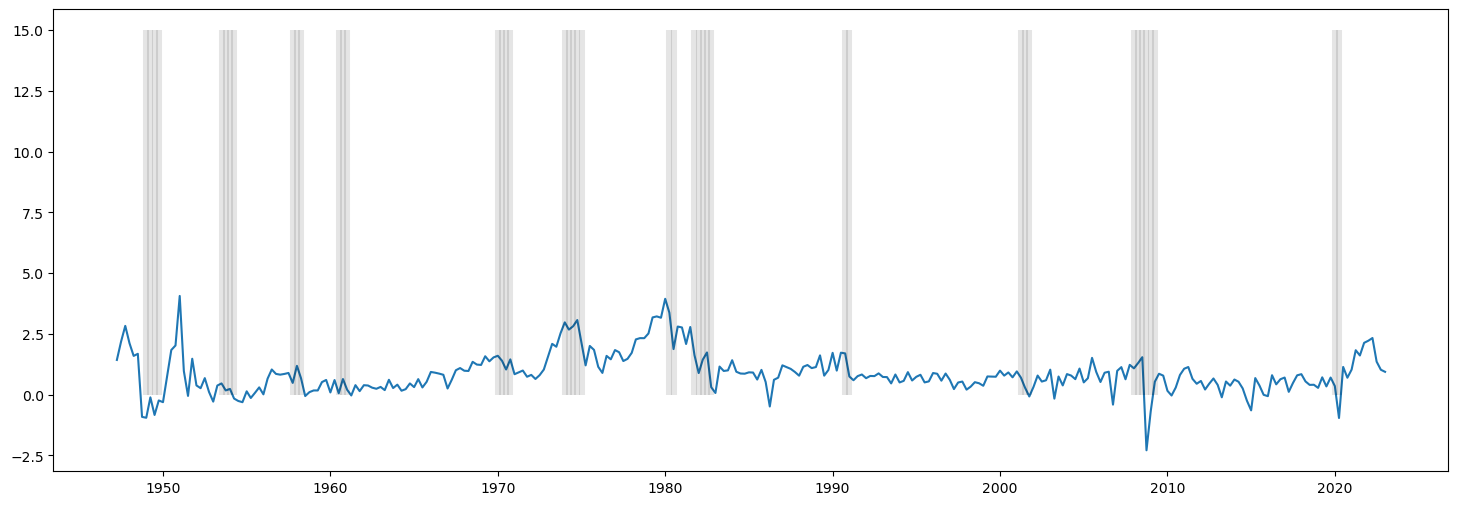

In [126]:
recession_cpi = recession[recession['DATE'] > datetime(1947, 1, 1)]
recession_cpi.head()

plt.figure(figsize=(18,6))
plt.plot(recession_cpi.DATE,recession_cpi.CPI)
for index, row in recession_cpi.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 15, color='k', alpha=0.1,linewidth = 4.4)

### With 3PPI

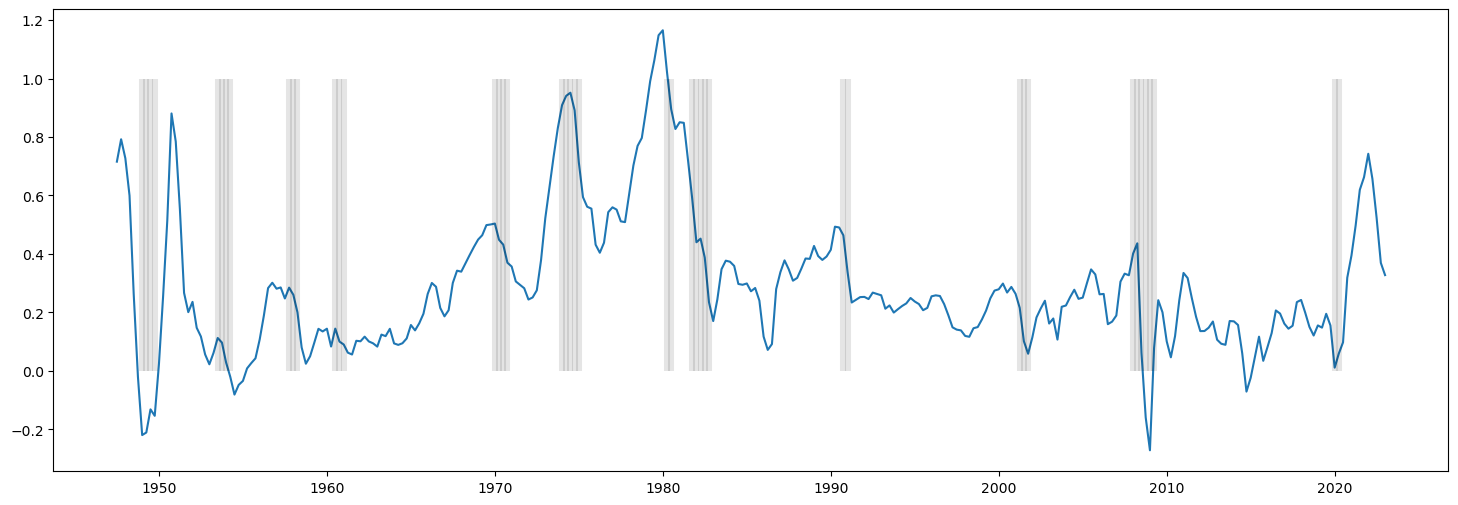

In [128]:
recession_cpi3 = recession[recession['DATE'] > datetime(1947, 4, 1)]
recession_cpi3.head()
plt.figure(figsize=(18,6))
plt.plot(recession_cpi3.DATE,recession_cpi3.CPI3)
for index, row in recession_cpi3.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 1, color='k', alpha=0.1,linewidth = 4.4)

### With Federal Funds

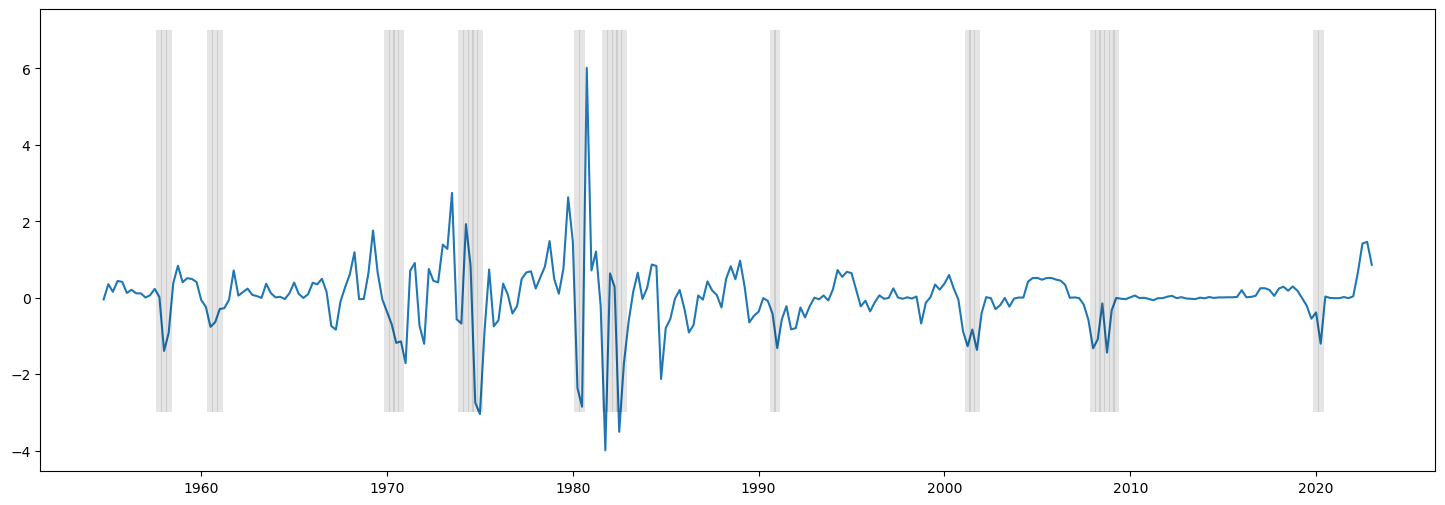

In [59]:
recession_fed = recession[recession['DATE'] > datetime(1954, 7, 1)]
recession_fed.head()
plt.figure(figsize=(18,6))
plt.plot(recession_fed.DATE,recession_fed.FEDFUND)
for index, row in recession_fed.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -3, ymax = 7, color='k', alpha=0.1,linewidth = 4.4)

### With MA Federal Funds

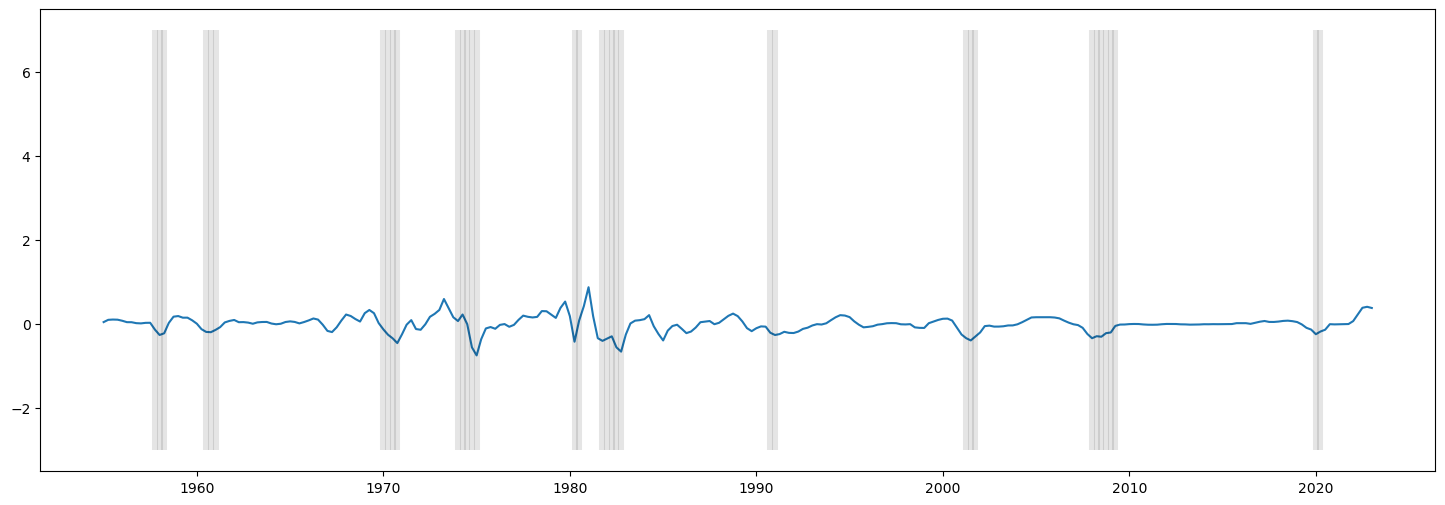

In [115]:
recession_fed3 = recession[recession['DATE'] > datetime(1954, 7, 1)]
recession_fed.head()
plt.figure(figsize=(18,6))
plt.plot(recession_fed3.DATE,recession_fed3.FEDFUND)
for index, row in recession_fed3.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -3, ymax = 7, color='k', alpha=0.1,linewidth = 4.4)

### PPI and GDP

<AxesSubplot:xlabel='GDP', ylabel='PPI'>

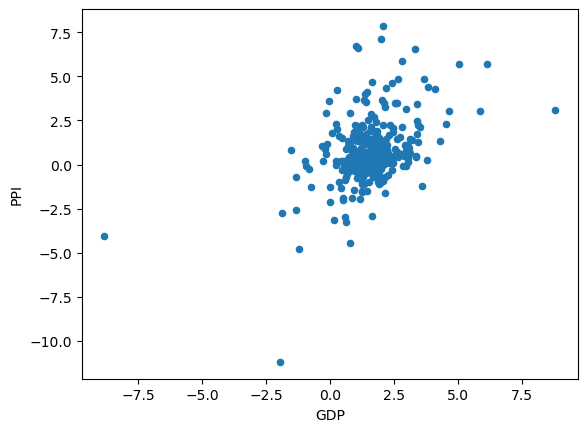

In [127]:
rec_ppi_gdp = recession[recession['DATE'] > datetime(1947, 1, 1)]
rec_ppi_gdp.head()
#recession_ppi.plot.scatter(x = 'DATE', y = 'PPI', c= 'STOCKS',colormap='PuBu')
rec_ppi_gdp.plot.scatter(x = 'GDP', y = 'PPI')#, c= '',colormap='PuBu')
#plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

## GDP Histogram

In [ ]:
for index, row in recession_gdp.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -3, ymax = 7, color='k', alpha=0.1,linewidth = 4.4)
plt.show()

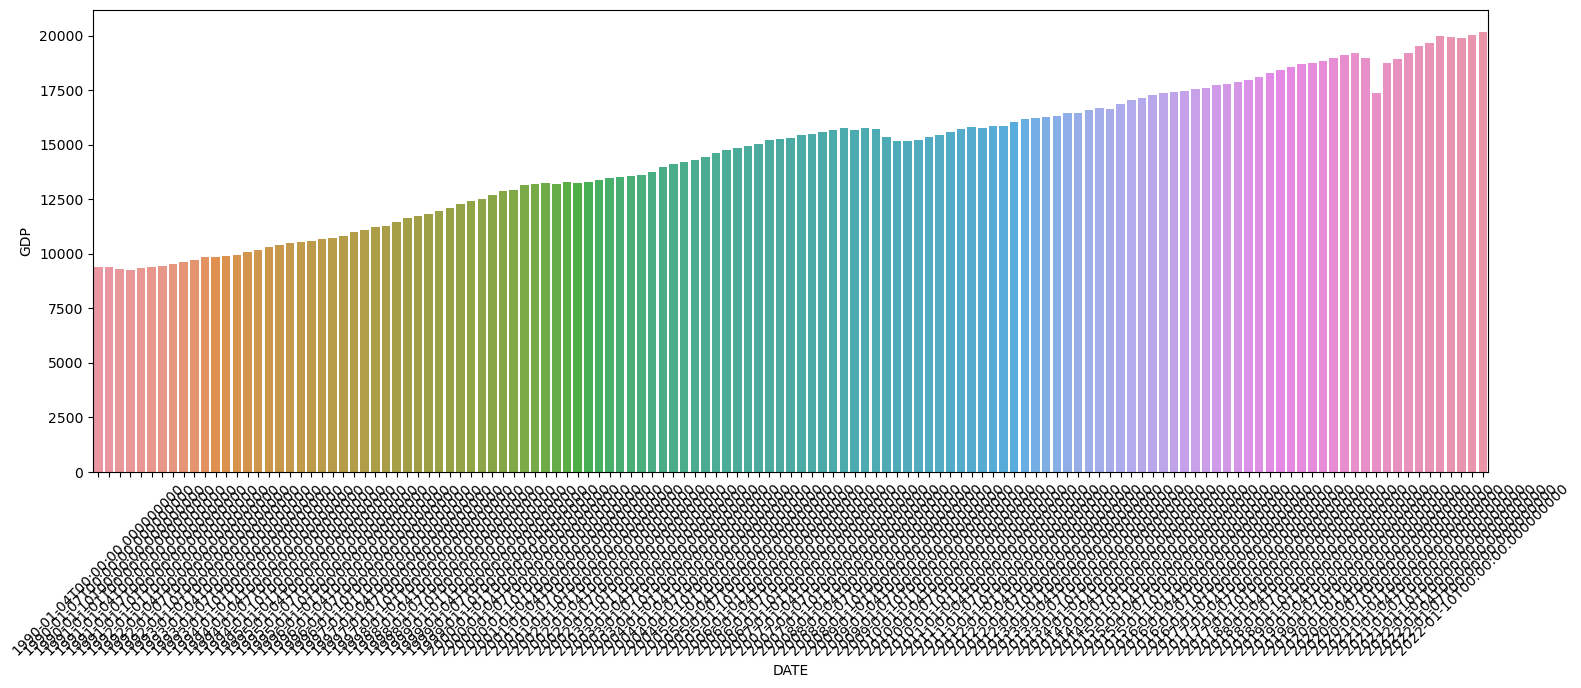

In [20]:
import seaborn as sns
recession_temp = pd.read_csv("GDPC1.csv", parse_dates=True)
recession_temp.DATE = pd.to_datetime(recession_temp.DATE)
recession_temp = recession_temp[recession_temp['DATE'] > datetime(1990,1,1)]
plt.figure(figsize=(18,6))
sns.barplot(x = 'DATE',
            y = 'GDP',
            data = recession_temp,
           )
plt.xticks(rotation=45)
#recession_gdp.plot.bar(x = 'DATE',y='GDP')
#plt.bar(x = recession_temp['DATE'],height=recession_temp['GDP'])
plt.show()


Text(0.5, 1.0, 'Yeild Curve of occurence of Recession based on GDP')

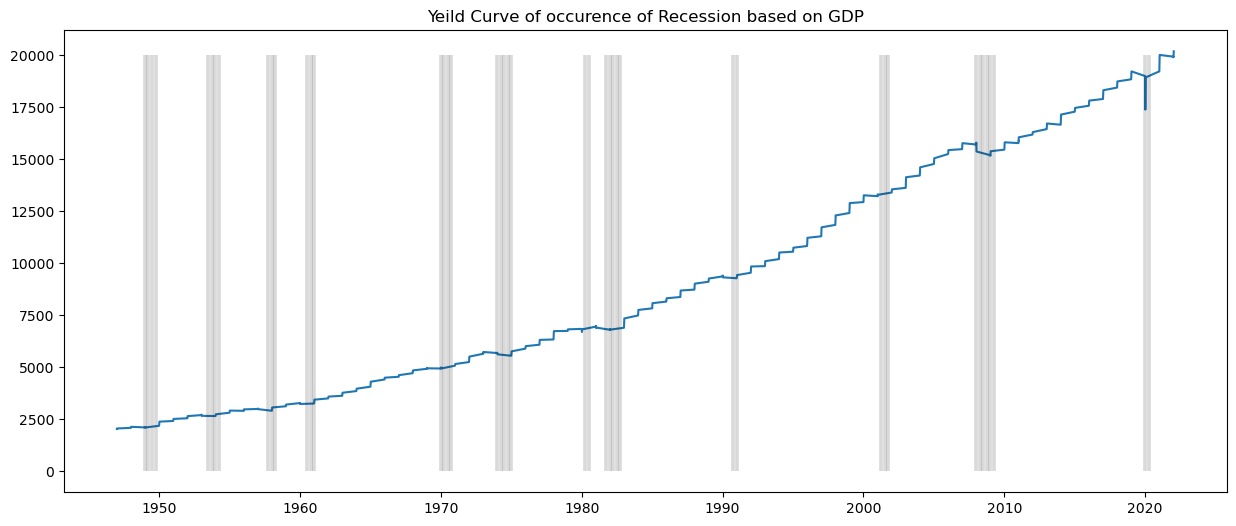

In [22]:
recession_temp = pd.read_csv("GDPC1.csv", parse_dates=True)
recession_temp.DATE = pd.to_datetime(recession_temp.DATE)
recession_temp = recession_temp[recession_temp['DATE'] > datetime(1947,1,1)]
plt.figure(figsize=(15,6))
plt.plot(recession_temp.DATE,recession_temp.GDP)
#plt.vlines(x=[datetime(1947, 1, 1), datetime(2024, 1, 1)], y=recession_gdp.USRECQ, color='r', label='test lines')
for index, row in recession_gdp.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = 0, ymax = 20000, color='k', alpha=0.15,linewidth = 2.6)
plt.title('Yeild Curve of occurence of Recession based on GDP')

### PPI and Recession 

Text(0.5, 1.0, 'GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

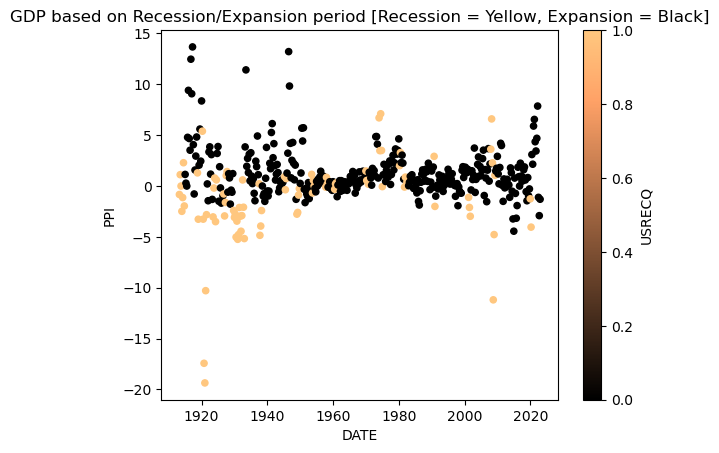

In [115]:
recession_ppi = recession[recession['DATE'] > datetime(1913, 1, 1)]
recession_ppi.plot.scatter(x = 'DATE', y = 'PPI', c= 'USRECQ',colormap='copper')
plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

## Modelling

### Simple logistic regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = recession.drop(['USRECQ','DATE','QUARTER'], axis=1)
y = recession['USRECQ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       162
           1       0.79      0.31      0.45        61

    accuracy                           0.79       223
   macro avg       0.79      0.64      0.66       223
weighted avg       0.79      0.79      0.75       223

[[157   5]
 [ 42  19]]
0.7892376681614349


892 1804 223


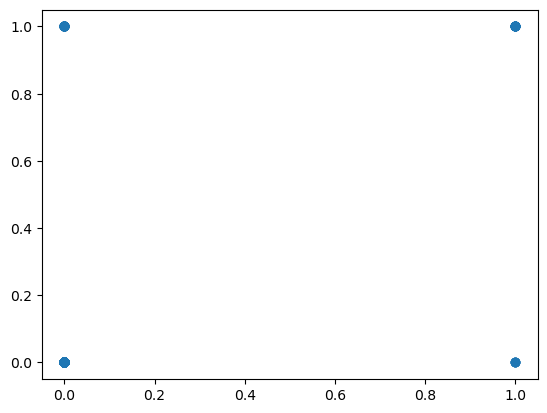

In [16]:
print(x_test.size, x_train.size, y_test.size)
plt.plot(predictions)#, y_test)#, c= '',colormap='PuBu')

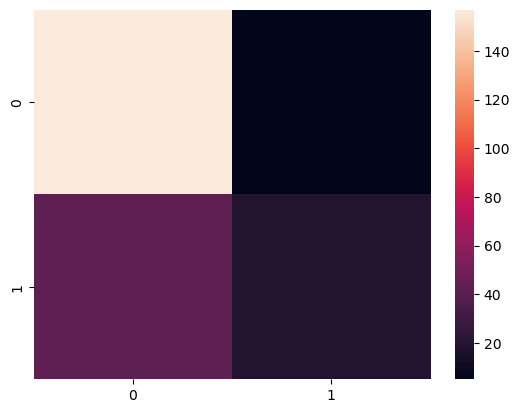

In [9]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

### KNN

In [7]:
recession.head()

,DATE,USRECQ,UNEMP,PPI,GDP,STOCKS,QUARTER
0,1854-10-01,1,0.0,0.0,0.0,0.0,Q4
1,1855-01-01,0,0.0,0.0,0.0,0.0,Q1
2,1855-04-01,0,0.0,0.0,0.0,0.0,Q2
3,1855-07-01,0,0.0,0.0,0.0,0.0,Q3
4,1855-10-01,0,0.0,0.0,0.0,0.0,Q4


In [8]:
recession.tail(10)

,DATE,USRECQ,UNEMP,PPI,GDP,STOCKS,QUARTER
664,2020-10-01,0,6.766667,2.14482,1.60224,8.43589,Q4
665,2021-01-01,0,6.200000,5.89619,2.80651,10.53875,Q1
666,2021-04-01,0,5.933333,6.55140,3.28533,7.53339,Q2
667,2021-07-01,0,5.133333,4.35358,2.18461,5.14990,Q3
668,2021-10-01,0,4.200000,3.44493,3.39145,3.71596,Q4
669,2022-01-01,0,3.800000,4.69418,1.60728,-4.08296,Q1
670,2022-04-01,0,3.600000,7.86232,2.05330,-8.52256,Q2
671,2022-07-01,0,3.566667,-1.11063,1.88314,-2.91799,Q3
672,2022-10-01,0,3.600000,-2.91200,1.60959,-3.38433,Q4
673,2023-01-01,0,3.500000,-1.29837,0.00000,3.91445,Q1
